# **Data Loading**

In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = "/content/verticle_farming_dataset.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()


,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Humidity Layer A,Humidity Layer B,Door
0,1924,2000-01-01 00:00:00,25.002968,19.698718,46.554858,42.477965,0
1,1894,2000-01-01 01:00:00,26.149738,23.073634,78.012732,81.200566,1
2,1011,2000-01-01 02:00:00,20.523260,18.463343,39.411010,25.432781,0
3,1111,2000-01-01 03:00:00,17.617682,19.175223,47.941998,24.875994,0
4,1024,2000-01-01 04:00:00,18.080046,16.520452,44.077954,44.203032,0


# **Data Preprocessing**

In [ ]:
null_values = df.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
Cube ID                0
Timestamp              0
Temperature Layer A    0
Temperature Layer B    0
Humidity Layer A       0
Humidity Layer B       0
Door                   0
dtype: int64


In [ ]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert datetime to Unix timestamp (integer)
df['Timestamp'] = (df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

In [ ]:
df.describe()

,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Humidity Layer A,Humidity Layer B,Door
count,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,1500.433937,1.004283e+09,22.474143,22.478858,54.885921,54.912765,0.495156
std,288.915283,3.325590e+07,3.901571,3.890907,18.093332,18.044769,0.499984
min,1000.000000,9.466848e+08,7.471589,8.633310,0.048306,3.086743,0.000000
25%,1249.000000,9.754839e+08,19.681300,19.710677,39.842329,39.791456,0.000000
50%,1501.000000,1.004283e+09,22.469422,22.471791,54.508376,54.831514,0.000000
75%,1750.000000,1.033082e+09,25.255063,25.267714,70.080251,69.926141,1.000000
max,1999.000000,1.061881e+09,37.680076,36.058152,109.217772,107.513759,1.000000


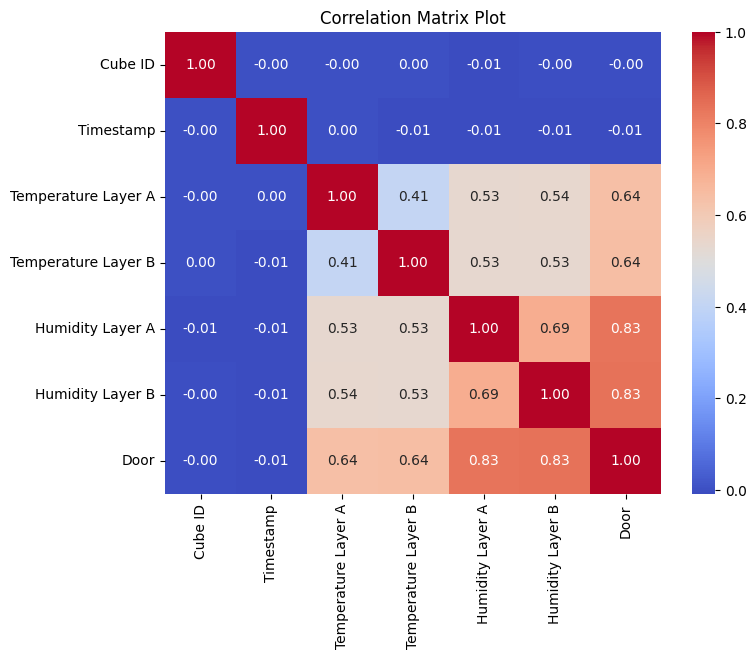

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculating correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot')
plt.show()

# **Exploratory Data Analysis**

In [ ]:
from tabulate import tabulate

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# Check for missing values
print("\nMissing values:")
print(tabulate(df.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='psql'))

# Check data types of columns
print("\nData types:")
print(tabulate(df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='psql'))


First few rows of the dataset:
+----+-----------+-------------+-----------------------+-----------------------+--------------------+--------------------+--------+
|    |   Cube ID |   Timestamp |   Temperature Layer A |   Temperature Layer B |   Humidity Layer A |   Humidity Layer B |   Door |
|----+-----------+-------------+-----------------------+-----------------------+--------------------+--------------------+--------|
|  0 |      1924 | 9.46685e+08 |               25.003  |               19.6987 |            46.5549 |            42.478  |      0 |
|  1 |      1894 | 9.46688e+08 |               26.1497 |               23.0736 |            78.0127 |            81.2006 |      1 |
|  2 |      1011 | 9.46692e+08 |               20.5233 |               18.4633 |            39.411  |            25.4328 |      0 |
|  3 |      1111 | 9.46696e+08 |               17.6177 |               19.1752 |            47.942  |            24.876  |      0 |
|  4 |      1024 | 9.46699e+08 |             

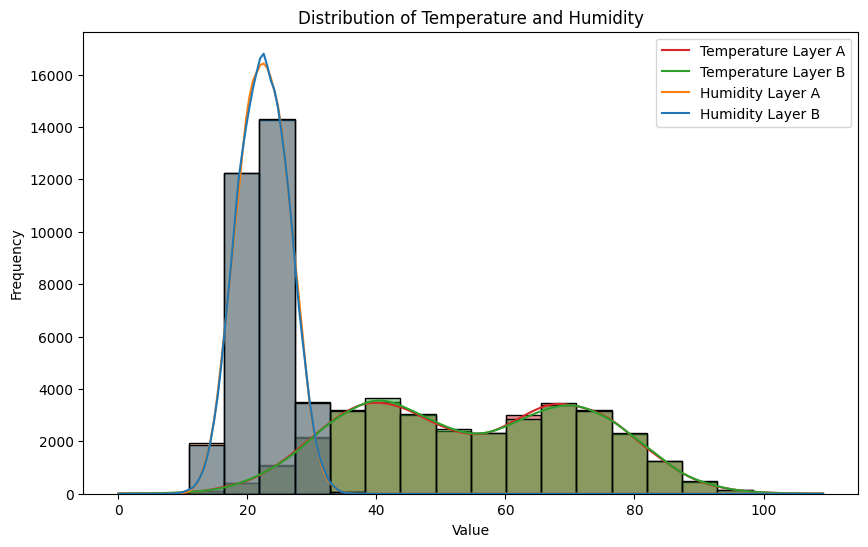

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize distributions of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(data=df[['Temperature Layer A', 'Temperature Layer B', 'Humidity Layer A', 'Humidity Layer B']], bins=20, kde=True)
plt.title('Distribution of Temperature and Humidity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Temperature Layer A', 'Temperature Layer B', 'Humidity Layer A', 'Humidity Layer B'])
plt.show()

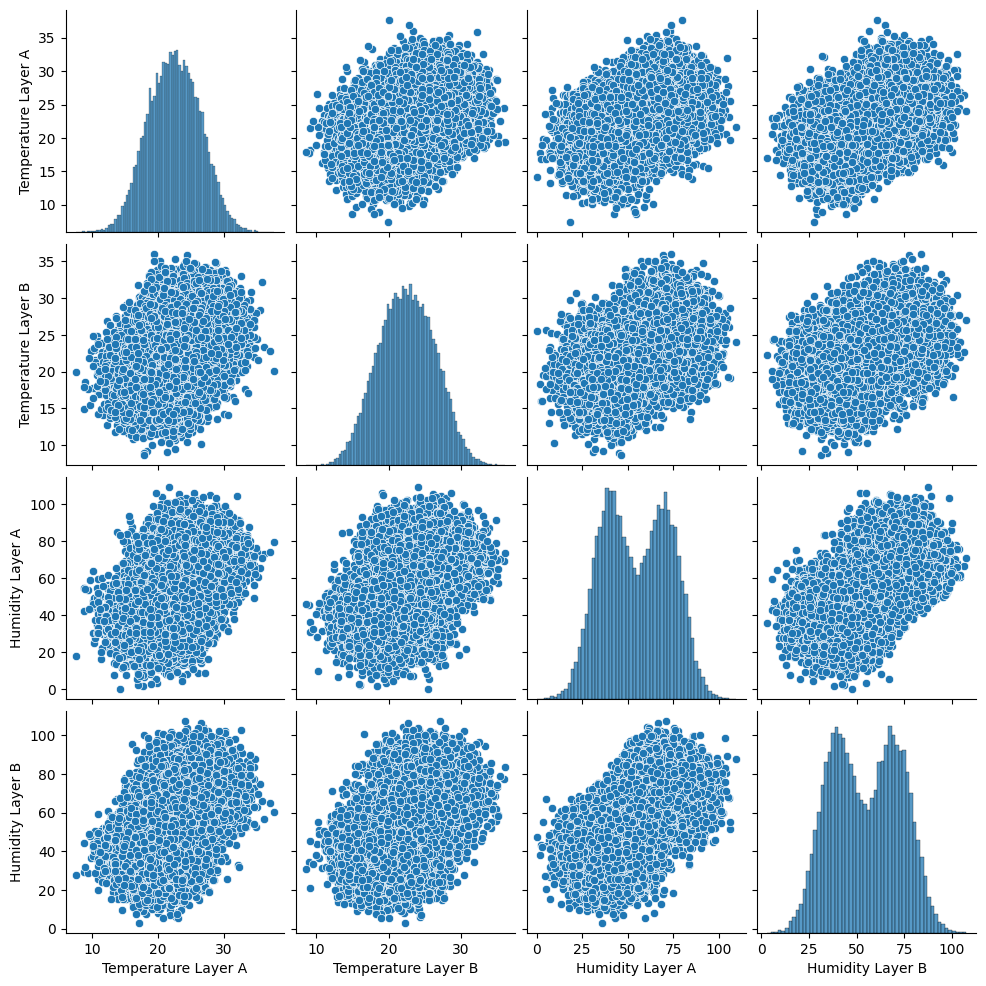

In [ ]:

# Visualize the relationship between numerical variables
sns.pairplot(df[['Temperature Layer A', 'Temperature Layer B', 'Humidity Layer A', 'Humidity Layer B']])
plt.show()

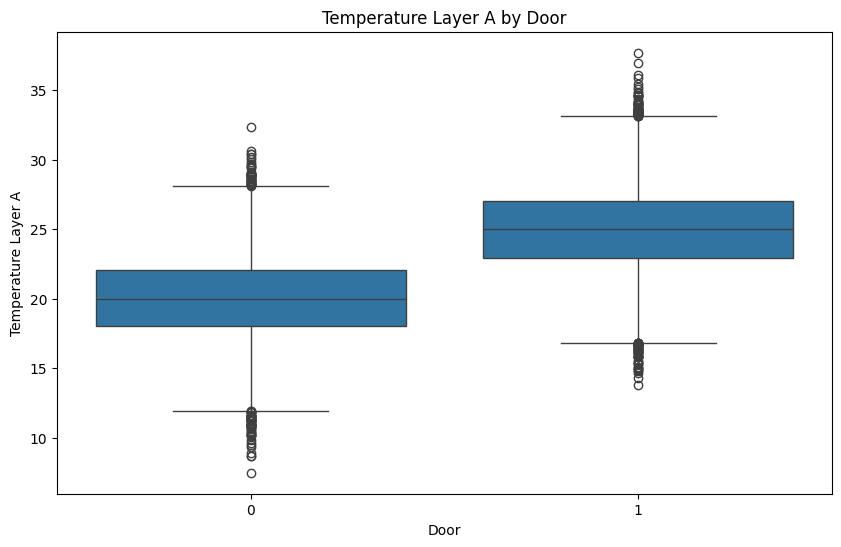

In [ ]:
# Visualize the relationship between categorical variable 'Door' and numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Door', y='Temperature Layer A')
plt.title('Temperature Layer A by Door')
plt.xlabel('Door')
plt.ylabel('Temperature Layer A')
plt.show()

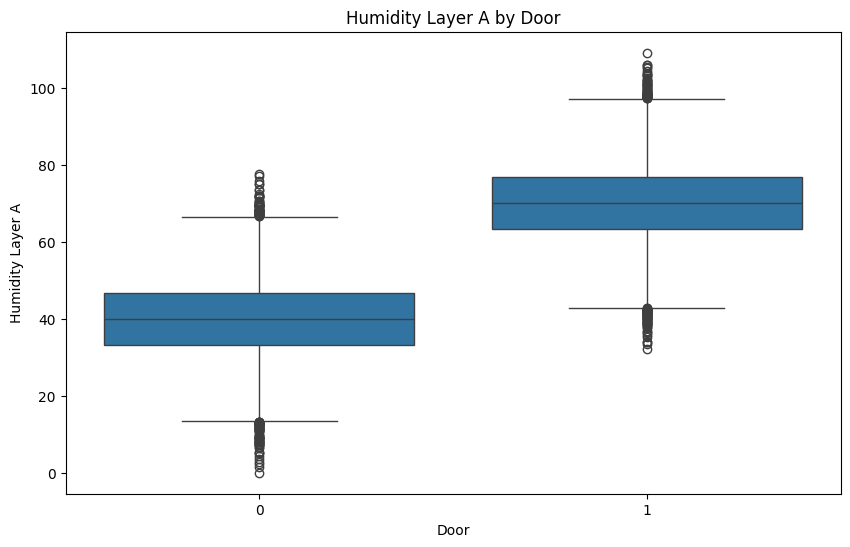

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Door', y='Humidity Layer A')
plt.title('Humidity Layer A by Door')
plt.xlabel('Door')
plt.ylabel('Humidity Layer A')
plt.show()

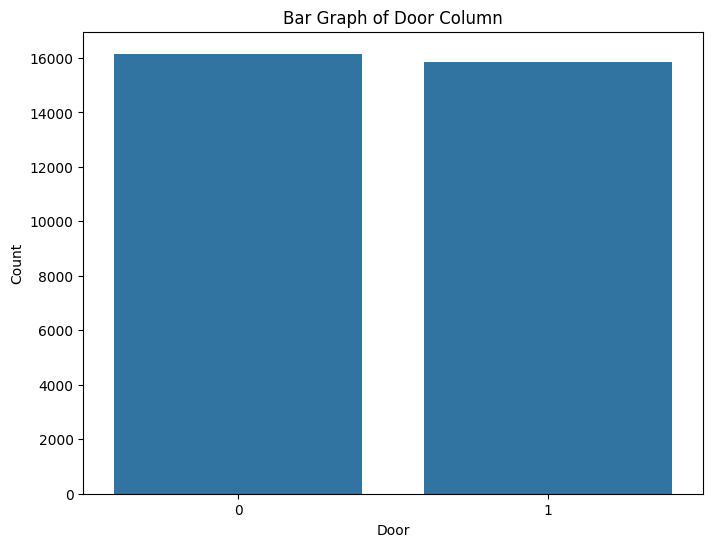

In [ ]:
# Count the occurrences of each value in the 'Door' column
door_counts = df['Door'].value_counts()

# Plot bar graph for the 'Door' column
plt.figure(figsize=(8, 6))
sns.barplot(x=door_counts.index, y=door_counts.values)
plt.title('Bar Graph of Door Column')
plt.xlabel('Door')
plt.ylabel('Count')
plt.show()

# **Data Preparation**

**Door Status (Open/Closed):**

**Predicting whether the door of the vertical farming cube will be open or closed could be crucial for controlling the internal environment. An accurate predictive model could help in automating the operation of the door, ensuring optimal conditions for plant growth while minimizing energy consumption. For instance, if the model predicts that the door will remain closed during high external temperatures, it can help prevent overheating inside the cube.**

In [ ]:
#Features(X)
X = df[['Cube ID',	'Temperature Layer A',	'Temperature Layer B', 'Humidity Layer A',	'Humidity Layer B']]

# Target label (Y)]
Y = df['Door']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features in X
X_normalized = scaler.fit_transform(X)

# Display the shape of X_normalized
print("Shape of X_normalized (normalized features):", X_normalized.shape)


Shape of X_normalized (normalized features): (32000, 5)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (25600, 5)
Shape of X_test: (6400, 5)
Shape of Y_train: (25600,)
Shape of Y_test: (6400,)


# **Applying Algorithms**

**1) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

**Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate precision
precision = precision_score(Y_test, Y_pred)

# Calculate recall
recall = recall_score(Y_test, Y_pred)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.99203125
Precision: 0.9911866540761725
Recall: 0.992749054224464
F1-score: 0.9919672389352653


**Evaluation Graphs**

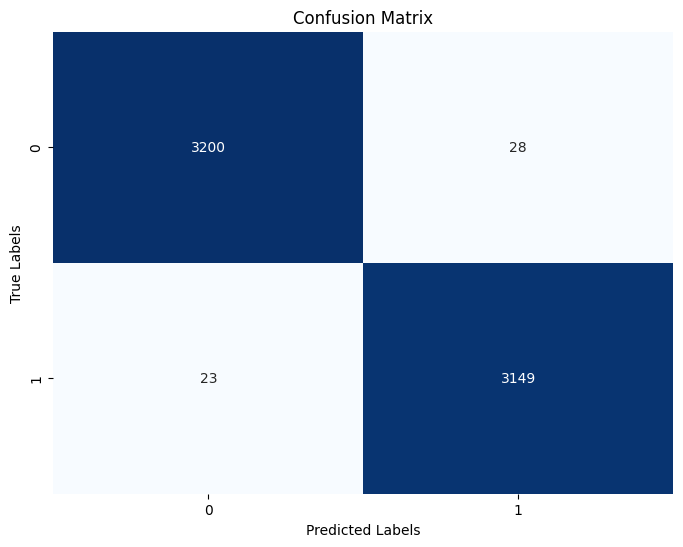

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**2) Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

# Calculate precision
precision_svm = precision_score(Y_test, Y_pred_svm)

# Calculate recall
recall_svm = recall_score(Y_test, Y_pred_svm)

# Calculate F1-score
f1_svm = f1_score(Y_test, Y_pred_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Accuracy: 0.99359375
Precision: 0.9936928413749606
Recall: 0.9933795712484237
F1-score: 0.9935361816175312


**Evaluation Graphs**

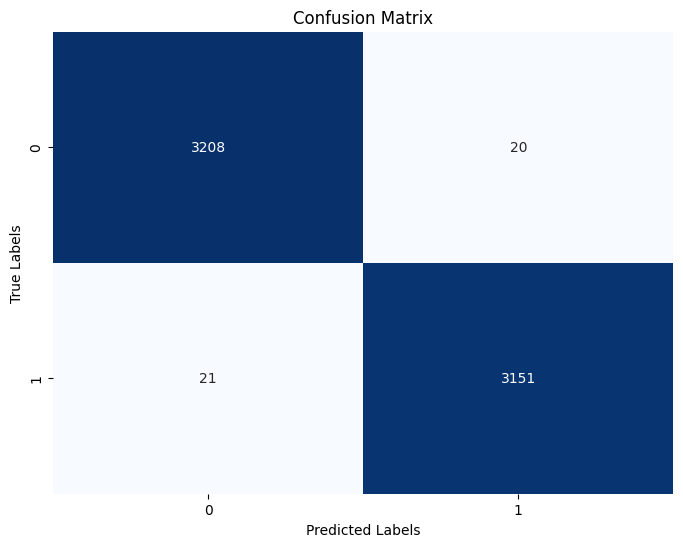

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**3) X_Gradient Boosting**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the XGBoost classifier on the training data
xgb_classifier.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)

# Calculate precision
precision_xgb = precision_score(Y_test, Y_pred_xgb)

# Calculate recall
recall_xgb = recall_score(Y_test, Y_pred_xgb)

# Calculate F1-score
f1_xgb = f1_score(Y_test, Y_pred_xgb)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

Accuracy: 0.99234375
Precision: 0.9924314096499527
Recall: 0.9921185372005045
F1-score: 0.9922749487624153


**Evaluation Graphs**

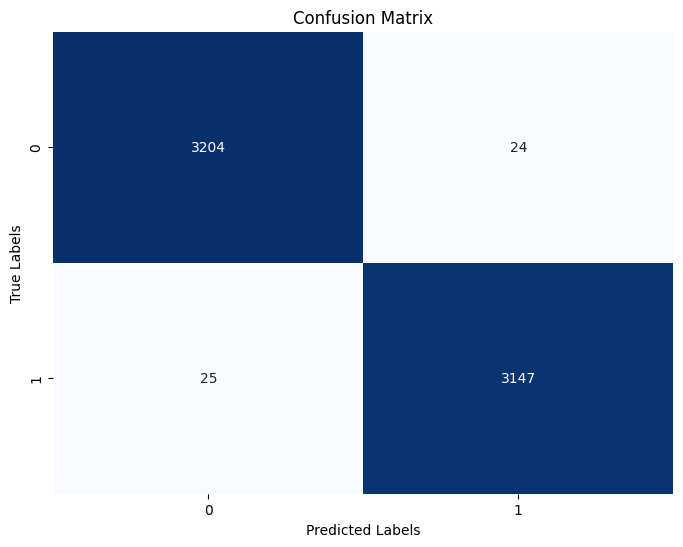

In [ ]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
